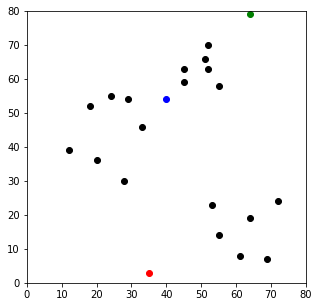

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame({'x' : [12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72], 'y' : [39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]})

k=3
centroids= {i+1 : [np.random.randint(0,80), np.random.randint(0,80)] for i in range(k)}
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'], color= 'k')
colmap = {1:'red', 2:'green', 3:'blue'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color =colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

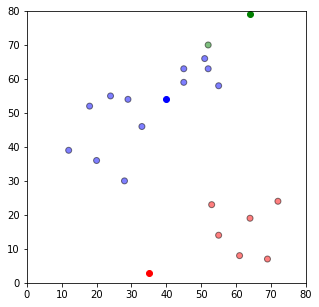

In [2]:
def w(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x']-centroids[i][0]) **2+ (df['y']-centroids[i][1])**2))
    centroid_distance_cols = ['distance_from_{}'.format(i)for i in centroids.keys()]
    df['closest'] = df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x:colmap[x])
    return df
df = w(df, centroids)

fig = plt.figure(figsize=(5 , 5))
plt.scatter(df['x'],df['y'], color = df['color'], alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [3]:
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest']==i]['x'])
        centroids[i][1] = np.mean(df[df['closest']==i]['y'])
    return k

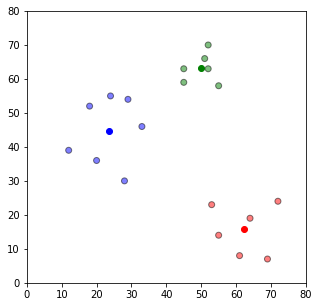

In [4]:
while True :
    closest_centroids = df['closest']
    centroids = update(centroids)
    df  = w(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5 , 5))
plt.scatter(df['x'],df['y'], color = df['color'], alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()